## LOAN  PREDICTION  USING  MACHINE  LEARNING

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

**Aim-** have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

In [88]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [89]:
# reading csv file
loan_data = pd.read_csv("/content/loan_prediction.csv")

In [90]:
# printing first five rows of dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
# Printing last five rows of datset
loan_data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [93]:
loan_data.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [39]:
# Obtaining the dimensions of dataset
loan_data.shape

(614, 13)

In this data set there are there are 12 independent columns and one of dependent column with 614 rows

In [94]:
# Statistical summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This gives the brief information about the dataset which includes indexing type, column type, o null values and memory usage.

In [95]:
# Check null values
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

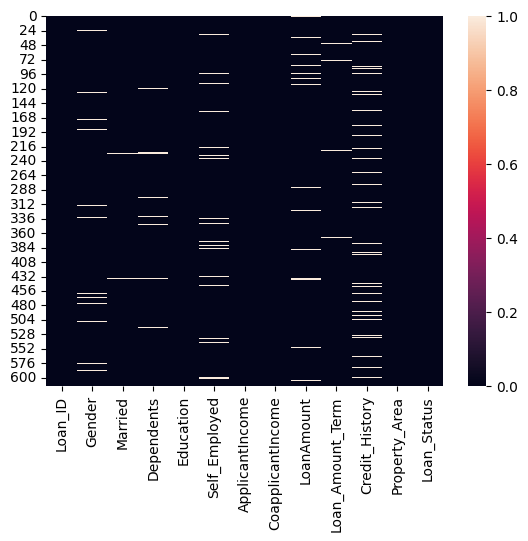

In [96]:
# Check Null values by Heatmap
sns.heatmap(loan_data.isnull())

here we can see that ther are null values are present in some columns

In [97]:
                    # Dealing with Categorical values

# Gender Column
loan_data['Gender'] =  loan_data['Gender'].map({'Male':0,'Female':1})

# Married column
loan_data['Married'] = loan_data['Married'].map({'No':0,'Yes':1})

# Loan_Status column
loan_data['Loan_Status'] =loan_data['Loan_Status'].map({'N':0,'Y':1})

In [98]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [45]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Filling Missing Values

In [99]:
# Gender column
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [100]:
# Married column
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [101]:
# Dependents Column
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [102]:
# Self_Employed Column
loan_data['Self_Employed'].fillna('No',inplace=True)

In [103]:
# Credit_History Column
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

In [104]:
# LoanAmount Column
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

In [105]:
# Loan_Amount Column
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])

<Axes: >

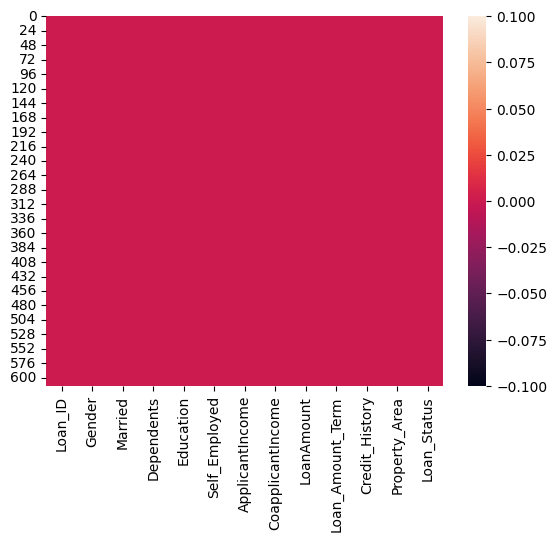

In [106]:
sns.heatmap(loan_data.isnull())

Now, After Remove null values there are no null values are present

In [108]:
loan_data.describe()

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,0.386497,0.476373,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

The counts of all the columns are same which means there are no missing values in the dataset.

By summarizing the data we can observe there is a huge differences between 75% and max in some columns hence there are outliers present int he data.

We can also notice the Standard deviation, minimum value, 25% percentile values from this describe method.

### Exploratory Data Analysis

In [109]:
# Just Check it
for i in loan_data['Gender']:
    if i==0.0:
        print(i,': Male')
    else:
        print(i,': Female')

0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
1.0 : Female
1.0 : Female
1.0 : Female
1.0 : Female
1.0 : Female
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
1.0 : Female
0.0 : Male
1.0 : Female
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 : Male
0.0 

In [110]:
# Counting the accurance of each value in Gender column
loan_data['Gender'].value_counts()

,count
Gender,
0.0,502
1.0,112


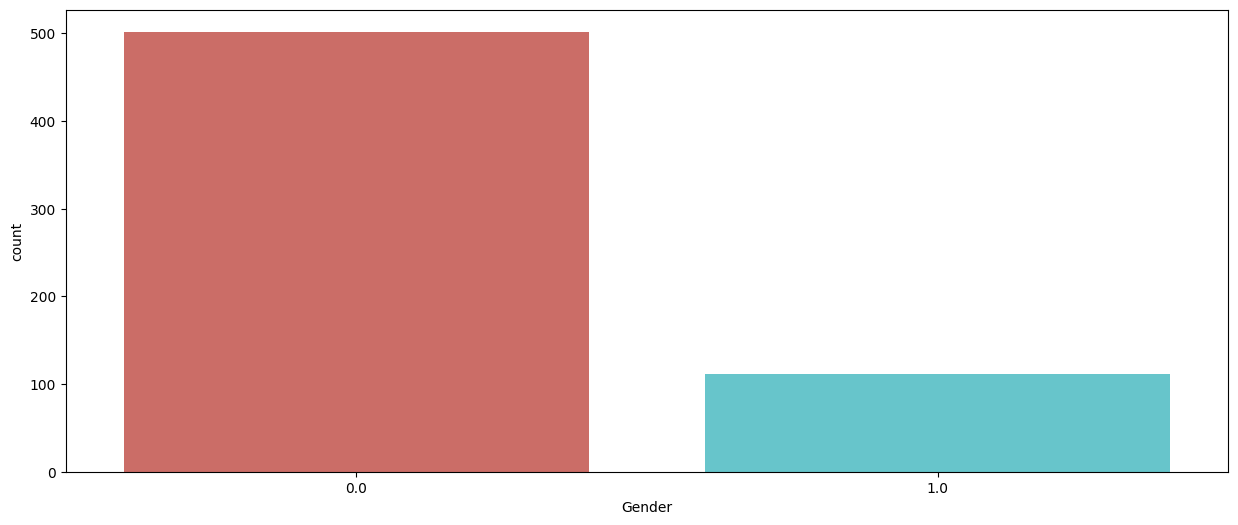

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(x='Gender', data= loan_data, palette = 'hls' )
plt.show()
# This bar graph show us that maximum Male person are taking loan comprision to Female

In [112]:
# Counting the accurance of each value in Dependent column
loan_data['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


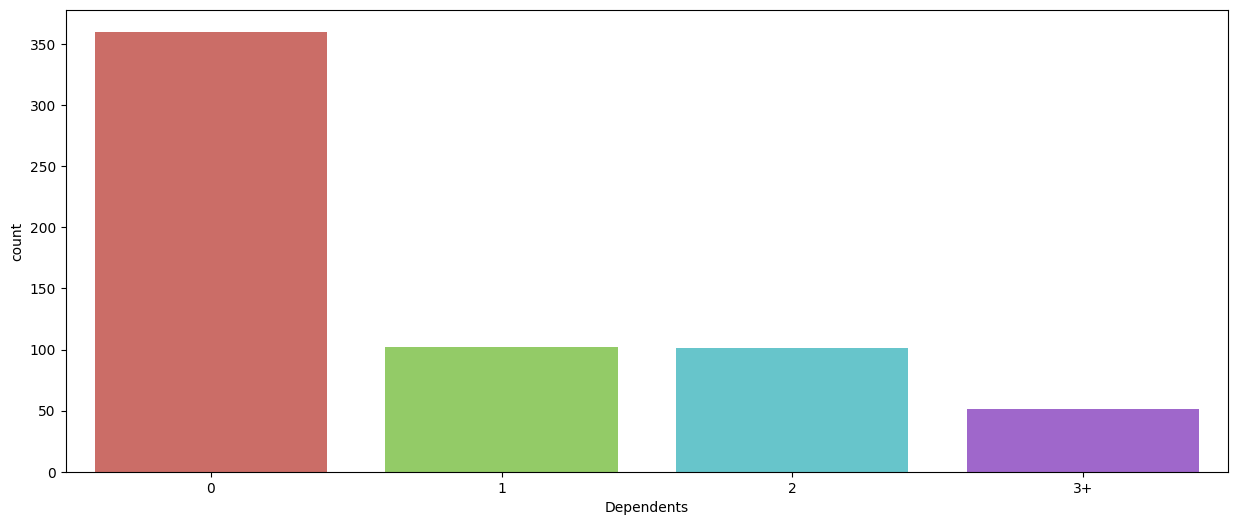

In [113]:
plt.figure(figsize=(15,6))
sns.countplot(x='Dependents', data = loan_data, palette='hls')
plt.show()

 More males are on loan than females. Also, those that are on loan are more than otherwise

 Married people collect more loan than unmarried

In [116]:
#Counting the occurence of each value with Loan_amount_term column
loan_data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,526
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


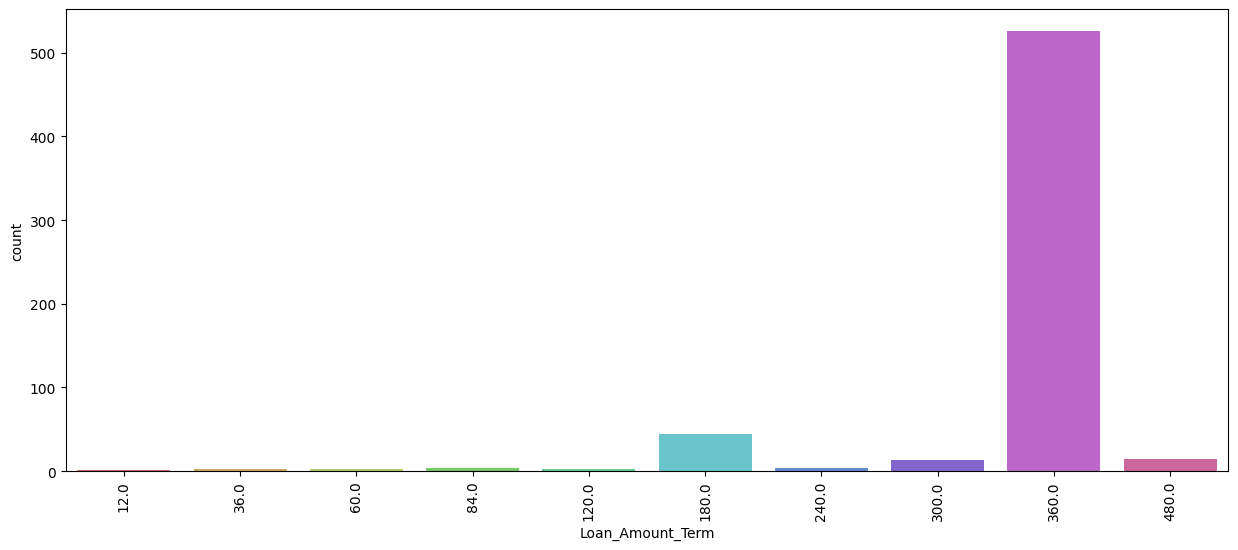

In [117]:
plt.figure(figsize=(15,6))
sns.countplot(x='Loan_Amount_Term', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

<Axes: >

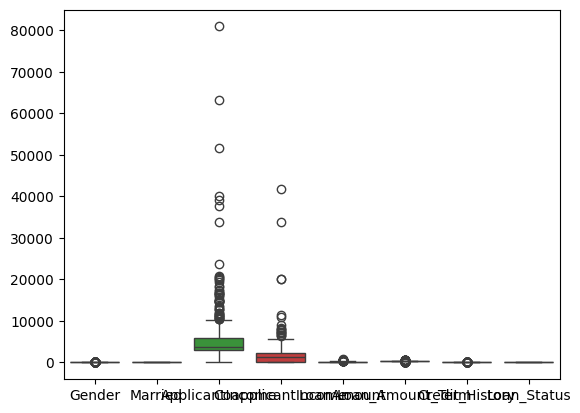

In [122]:
sns.boxplot(loan_data)

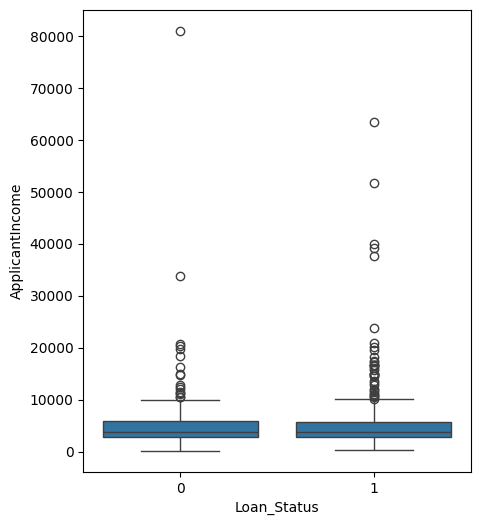

In [121]:
# plotting boxplot
plt.figure(figsize=(5,6))
sns.boxplot(x='Loan_Status',y = 'ApplicantIncome', data=loan_data)
plt.show()

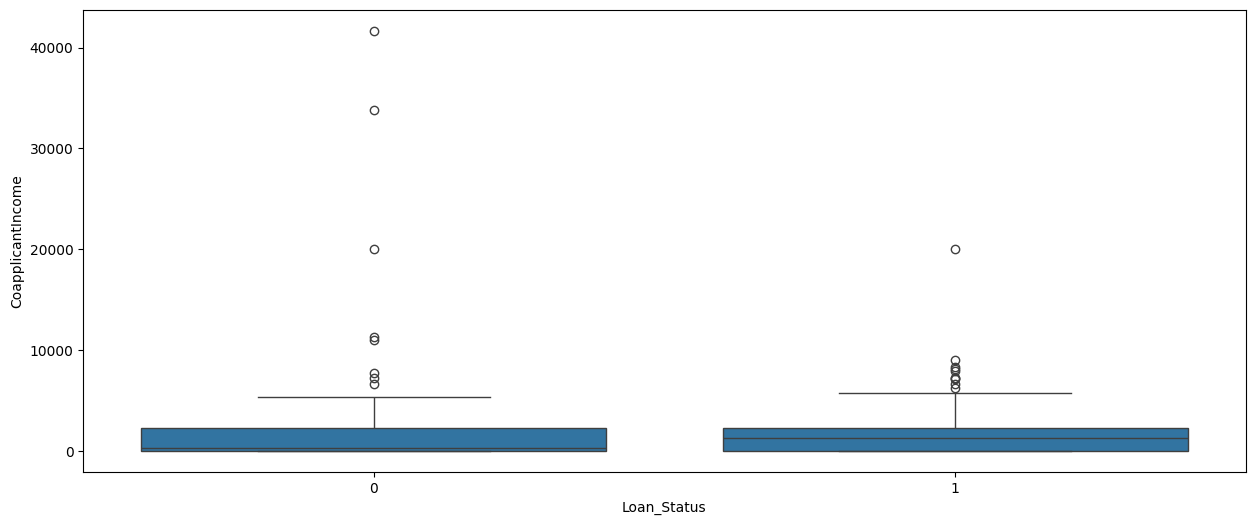

In [65]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data=loan_data)
plt.show()

In [66]:
loan_data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


In [67]:
## Showing correlation through heatmap
#plt.figure(figsize=(7,7))
#new=loan_data.drop('Loan_ID',axis=1)
#sns.heatmap(new.corr())

<Axes: xlabel='Property_Area', ylabel='count'>

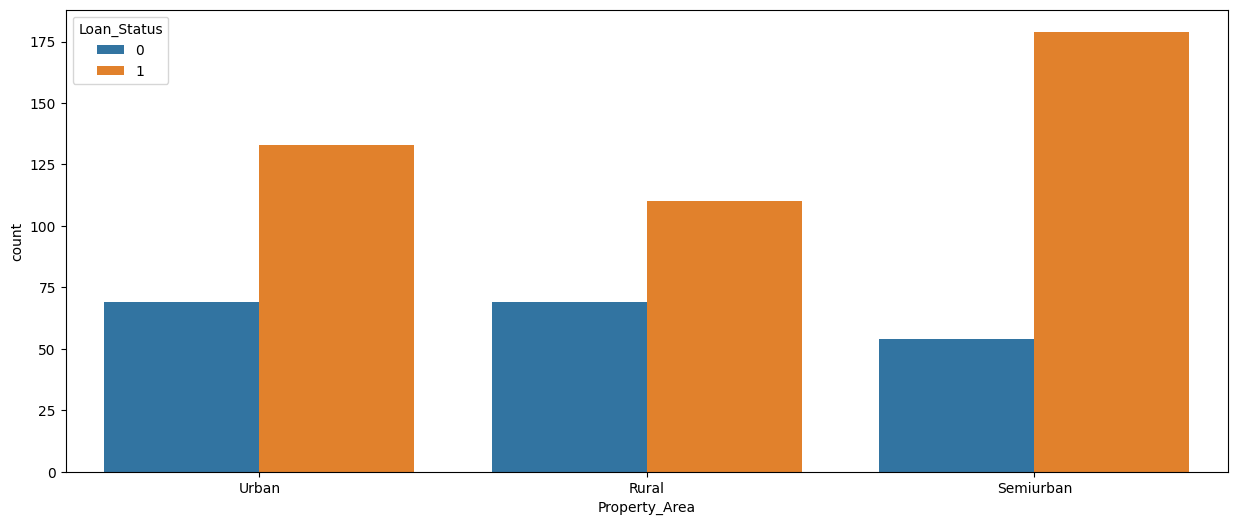

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = loan_data)

   Semiurban obtain more loan, folowed by Urban and then rural.  

<Axes: xlabel='Credit_History', ylabel='count'>

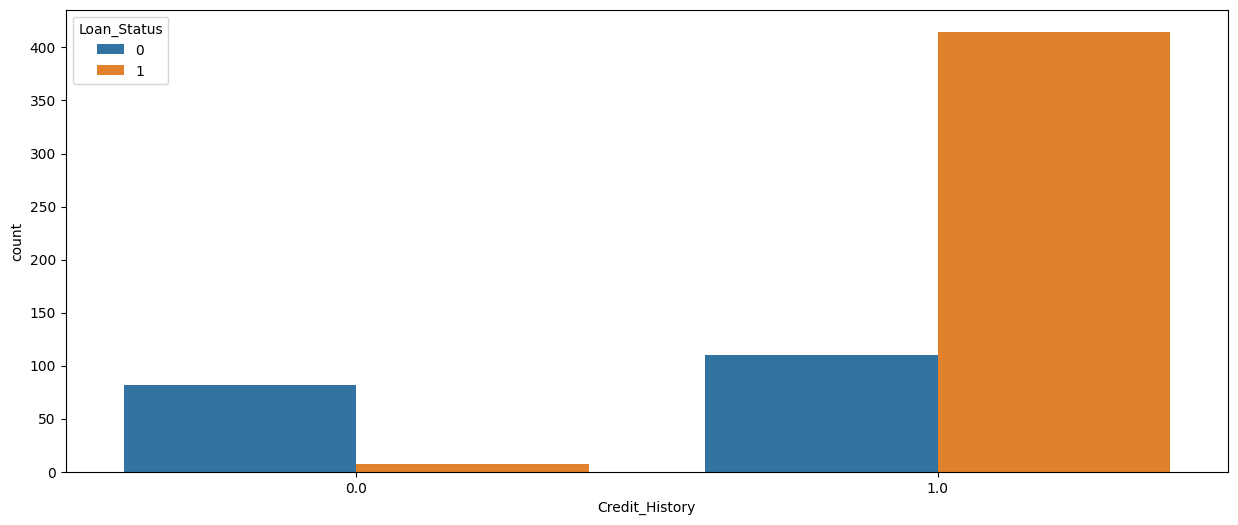

In [69]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit_History', hue='Loan_Status', data = loan_data)

  According to the credit history, greater number of people pay back their loans.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

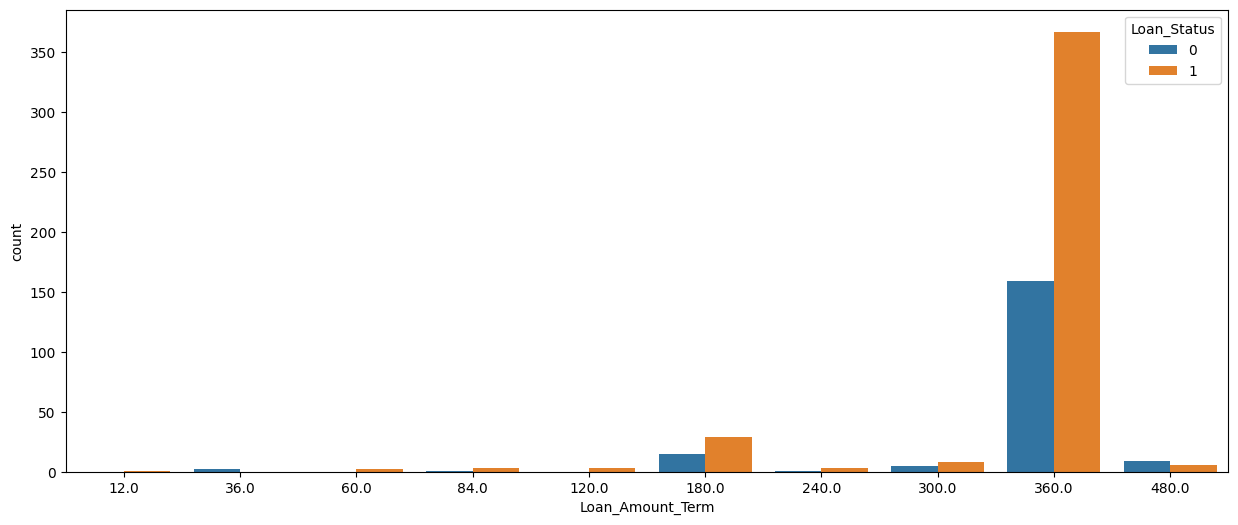

In [123]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Loan_Amount_Term', hue='Loan_Status', data = loan_data)

    An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

<Axes: xlabel='Self_Employed', ylabel='count'>

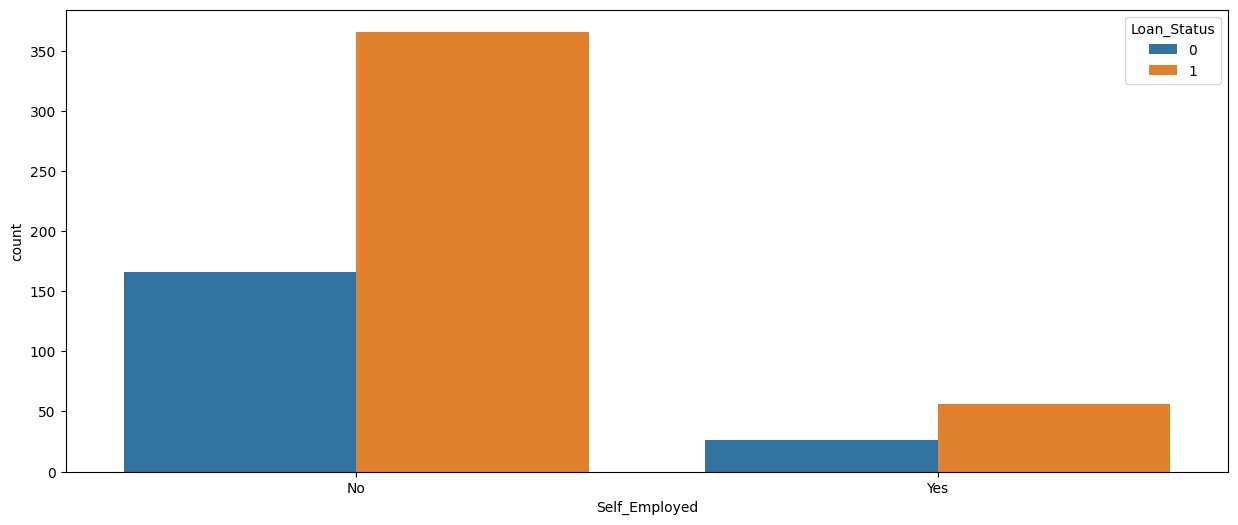

In [125]:
plt.figure(figsize=(15,6))
sns.countplot( x = 'Self_Employed', hue = 'Loan_Status', data = loan_data)

The category of those that take loans is less of self-employed people. That those who are not self-employed probably salary earners obtain more loan.

### Model Building and Prediction

In [126]:
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = loan_data.Loan_Status

In [128]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [129]:
# importing necessary libraies:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [130]:
# Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_cv)
pred_train=RFR.predict(x_train)

print('R2_score: ', r2_score(y_cv,pred_RFR))
print('R2_score on training Date: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_cv,pred_RFR))
print('Mean Squared Error: ', mean_squared_error(y_cv, pred_RFR))
print('Rooot Mean Swuared Error: ', np.sqrt(mean_squared_error(y_cv,pred_RFR)))

R2_score:  0.15867528735632197
R2_score on training Date:  88.59237696134711
Mean Absolute Error:  0.2915447154471545
Mean Squared Error:  0.1741707317073171
Rooot Mean Swuared Error:  0.4173376710857972


In [131]:
# Logistic Regression()
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_cv)
print(accuracy_score(y_cv,predLR))
print(confusion_matrix(y_cv,predLR))
print(classification_report(y_cv,predLR))

0.7967479674796748
[[12 24]
 [ 1 86]]
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



In [132]:
# Suport Vector Machine Classifier
# Checking accuracy for Suport Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_cv)
print(accuracy_score(y_cv,predsvc))
print(confusion_matrix(y_cv,predsvc))
print(classification_report(y_cv,predsvc))

0.7073170731707317
[[ 0 36]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.71      1.00      0.83        87

    accuracy                           0.71       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.50      0.71      0.59       123



In [133]:
# Gradient Boosting Classifier
# Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_cv)
print(accuracy_score(y_cv,predGB))
print(confusion_matrix(y_cv,predGB))
print(classification_report(y_cv,predGB))

0.8130081300813008
[[15 21]
 [ 2 85]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        36
           1       0.80      0.98      0.88        87

    accuracy                           0.81       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.83      0.81      0.79       123



In [134]:
# RandomForestClassifier
# Checking accuracy for RandomForestClasifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_cv)
print(accuracy_score(y_cv, predRFC))
print(confusion_matrix(y_cv,predRFC))
print(classification_report(y_cv,predRFC))

0.7723577235772358
[[15 21]
 [ 7 80]]
              precision    recall  f1-score   support

           0       0.68      0.42      0.52        36
           1       0.79      0.92      0.85        87

    accuracy                           0.77       123
   macro avg       0.74      0.67      0.68       123
weighted avg       0.76      0.77      0.75       123



In [135]:
# AddBoost Classfier
# Checking accurcy for AdaBoost Classifer
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC =ABC.predict(x_cv)
print(accuracy_score(y_cv,predABC))
print(confusion_matrix(y_cv,predABC))
print(classification_report(y_cv,predABC))

0.7967479674796748
[[13 23]
 [ 2 85]]
              precision    recall  f1-score   support

           0       0.87      0.36      0.51        36
           1       0.79      0.98      0.87        87

    accuracy                           0.80       123
   macro avg       0.83      0.67      0.69       123
weighted avg       0.81      0.80      0.77       123



In [136]:
# Bagging Classifier
# Checking accuracy for BaggingClassifgier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_cv)
print(accuracy_score(y_cv,predBC))
print(confusion_matrix(y_cv,predBC))
print(classification_report(y_cv,predBC))

0.7967479674796748
[[16 20]
 [ 5 82]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        36
           1       0.80      0.94      0.87        87

    accuracy                           0.80       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.80      0.78       123



In [137]:
# ExtraTreesClassfier
# Checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_cv)
print(accuracy_score(y_cv,predET))
print(confusion_matrix(y_cv, predET))
print(classification_report(y_cv,predET))

0.7398373983739838
[[16 20]
 [12 75]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50        36
           1       0.79      0.86      0.82        87

    accuracy                           0.74       123
   macro avg       0.68      0.65      0.66       123
weighted avg       0.73      0.74      0.73       123



In [138]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

In [139]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x_cv,y_cv)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is ', accuracy_score(y_cv,predRFC))

[0.76       0.8        0.72       0.75       0.79166667]
0.7643333333333333
Difference between Accuracy score and cross validation score is  0.7723577235772358


In [140]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x_cv,y_cv)
print(score)
print(score.mean())
print('Difference between Accuracy score and cress validation score is - ', accuracy_score(y_cv,predLR)-score.mean())

[0.72       0.84       0.76       0.875      0.79166667]
0.7973333333333333
Difference between Accuracy score and cress validation score is -  -0.0005853658536585371


In [141]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x_cv,y_cv)
print(score)
print(score.mean())
print('Difference Between Accuracy score and cross validation scoreis - ',accuracy_score(y_cv,predGB)-score.mean())

[0.64       0.72       0.76       0.79166667 0.66666667]
0.7156666666666667
Difference Between Accuracy score and cross validation scoreis -  0.09734146341463412


In [142]:
print('Score of LR : ',accuracy_score(y_cv,predLR))
print('Score of SVC : ',accuracy_score(y_cv,predsvc))
print('Score of GB : ',accuracy_score(y_cv,predGB))
print('Score of RFC : ',accuracy_score(y_cv, predRFC))
print('Score of ABC : ',accuracy_score(y_cv,predABC))
print('Score of BC : ',accuracy_score(y_cv,predBC))
print('Score of ET : ',accuracy_score(y_cv,predET))

Score of LR :  0.7967479674796748
Score of SVC :  0.7073170731707317
Score of GB :  0.8130081300813008
Score of RFC :  0.7723577235772358
Score of ABC :  0.7967479674796748
Score of BC :  0.7967479674796748
Score of ET :  0.7398373983739838


So Finally,
* we get the best accuracy score of Gradiant Booster

Thanks
* Navin Singh